In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt  

from RoZeroTools import utils
%matplotlib inline

### Load cumulative number of deaths by state (from JHU)

In [6]:
df = utils.load_JHU_deaths()
df.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0,0,0,0,0,0,0,0,0,0,...,80,92,93,99,114,118,133,148,153,157
Alaska,0,0,0,0,0,0,0,0,0,0,...,7,8,8,8,9,9,9,9,9,9
American Samoa,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Arizona,0,0,0,0,0,0,0,0,0,0,...,97,108,115,122,131,142,150,169,180,184
Arkansas,0,0,0,0,0,0,0,0,0,0,...,21,25,27,29,32,33,37,37,38,39


Text(0, 0.5, 'Cumulative Deaths')

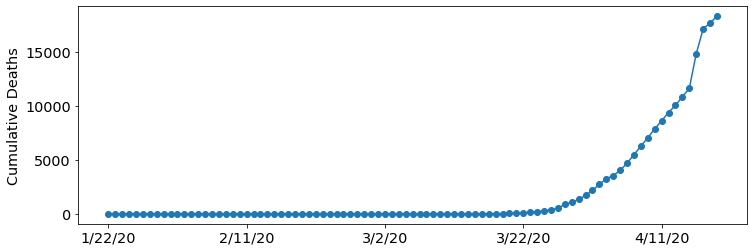

In [14]:
fig , ax = plt.subplots(figsize= (12,4), )
df.loc["New York", :].plot(ax = ax, marker = 'o')
ax.set_ylabel("Cumulative Deaths")

### Convert cumulative deaths to deaths by day

In [15]:
df_byday = df.diff(axis = 1).dropna(axis = 1)  ## The diff function computes (cumulative deaths day i) - (cumulative deaths day i-1) 
df_byday.head()

,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,...,4/10/20,4/11/20,4/12/20,4/13/20,4/14/20,4/15/20,4/16/20,4/17/20,4/18/20,4/19/20
Province_State,,,,,,,,,,,,,,,,,,,,,
Alabama,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10.0,12.0,1.0,6.0,15.0,4.0,15.0,15.0,5.0,4.0
Alaska,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
American Samoa,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Arizona,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,11.0,7.0,7.0,9.0,11.0,8.0,19.0,11.0,4.0
Arkansas,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4.0,2.0,2.0,3.0,1.0,4.0,0.0,1.0,1.0


Text(0, 0.5, 'Deaths By Day')

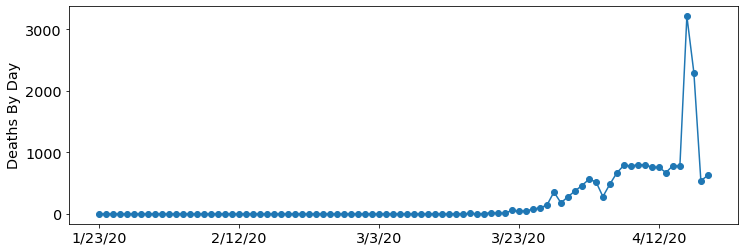

In [16]:
fig , ax = plt.subplots(figsize= (12,4), )
df_byday.loc["New York", :].plot(ax = ax, marker = 'o')
ax.set_ylabel("Deaths By Day")

## To do:
- Detect outiers in deaths by day and replace with more reasonable values
- Sooth (onle when necessary) deaths by day for states with large fluctuation by day
- Is there something about JHU data processing that explains the outliers which we do not understand?

## Method:
- Code can be developed in this (or other notebook)
- Once code works it can be included in ( RoZeroTools/utils.py ). Alternatively functions already defined in RoZeroTools/utils.py  can be modified